In [98]:
import pandas as pd


import multiprocessing
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from scipy import spatial

%matplotlib inline

In [2]:
music_df = pd.read_csv('./Titled_Digital_Music_5.csv',index_col=0)

In [18]:
music_df = music_df.dropna()

In [24]:
music_df['reviewYear'] = music_df['reviewTime'].apply(lambda x: int(x.split(',')[1]))

/Users/zhicongchen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


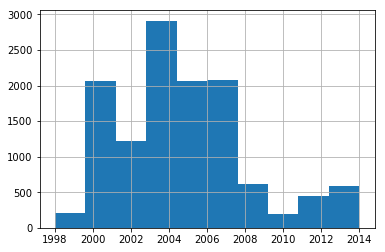

In [30]:
music_df['reviewYear'].hist()

In [56]:
# from nltk.tokenize import TweetTokenizer
# tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

from nltk.tokenize.regexp import WordPunctTokenizer
tknzr = WordPunctTokenizer()
corpus = [tknzr.tokenize(s1.lower()) for s1 in music_df.reviewText.values]

In [59]:
# corpus is a list of list of string(word)
# eg:
# corpus = [["cat", "say", "meow"], ["dog", "say", "woof"]]

# 300 dimensions
model = Word2Vec(corpus, size=300, window=10, min_count=5,
                workers=multiprocessing.cpu_count(), hs=1, negative=0) # negative sampling, hs: hierarchical softmax

In [60]:
word_vectors = model.wv
word_vectors.save_word2vec_format('./music_all_vec_300_dims.txt')

In [ ]:
# word_vectors = KeyedVectors.load_word2vec_format('./book_vec_200_dims.txt')

In [61]:
word_vectors.vocab

{'i': <gensim.models.keyedvectors.Vocab at 0x1c318efc50>,
 'think': <gensim.models.keyedvectors.Vocab at 0x1c4aebac50>,
 'this': <gensim.models.keyedvectors.Vocab at 0x1c31692c88>,
 'is': <gensim.models.keyedvectors.Vocab at 0x1c48fe7358>,
 'by': <gensim.models.keyedvectors.Vocab at 0x1c48fe73c8>,
 'far': <gensim.models.keyedvectors.Vocab at 0x1c48fe7438>,
 'the': <gensim.models.keyedvectors.Vocab at 0x1c48fe74a8>,
 'best': <gensim.models.keyedvectors.Vocab at 0x1c48fe74e0>,
 'cd': <gensim.models.keyedvectors.Vocab at 0x1c48fe7518>,
 'have': <gensim.models.keyedvectors.Vocab at 0x1c48fe7588>,
 'ever': <gensim.models.keyedvectors.Vocab at 0x1c48fe75c0>,
 'purchased': <gensim.models.keyedvectors.Vocab at 0x1c48fe75f8>,
 '.': <gensim.models.keyedvectors.Vocab at 0x1c48fe7668>,
 'singing': <gensim.models.keyedvectors.Vocab at 0x1c48fe76a0>,
 'superb': <gensim.models.keyedvectors.Vocab at 0x1c48fe7710>,
 ',': <gensim.models.keyedvectors.Vocab at 0x1c48fe7748>,
 'music': <gensim.models.keyed

In [87]:
gwords = [
    ['man','woman'],
    ['men','women'],
    ['he','she'],
    ['him','her'],
    ['his','her'],
    ['boy','girl'],
    ['male','female'],
    ['masculine','feminine']
] # gender words

cwords = [
    ['rich','poor'],
#     ['richer','poorer'],
#     ['richest','poorest'],
    ['affluence','poverty'],
    ['affluent','impoverished'],
    ['expensive','inexpensive'],
    ['luxury','cheap'],
    ['opulent','needy']
] # class words

In [62]:
model.similarity('woman', 'man')

0.40044528061790957

In [66]:
model.most_similar('worry')

[('care', 0.5547317862510681),
 ('count', 0.5172919034957886),
 ('forget', 0.48251378536224365),
 ('talk', 0.482020765542984),
 ('complain', 0.45840713381767273),
 ('brag', 0.45494386553764343),
 ('mondays', 0.4448202848434448),
 ('anymore', 0.4241331219673157),
 ('2night', 0.4068063795566559),
 ('tolerate', 0.39137014746665955)]

In [64]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('teeny', 0.3679477870464325),
 ('seger', 0.34950608015060425),
 ('bopper', 0.34091314673423767),
 ('thereby', 0.3398732841014862),
 ('lucy', 0.3332895338535309),
 ('musings', 0.3305656909942627),
 ('levine', 0.3214671015739441),
 ('wild', 0.32122400403022766),
 ('strokes', 0.3190215528011322),
 ('society', 0.3183538615703583)]

In [73]:
adjectives_list = '''headstrong, thankless, tactful, distrustful, quarrelsome, effeminate, fickle, talkative, depend- able, resentful, sarcastic, unassuming, changeable, resourceful, persevering, forgiving, assertive, individualistic, vindictive, sophisticated, deceitful, impulsive, sociable, methodical, idealistic, thrifty, outgoing, intolerant, au- tocratic, conceited, inventive, dreamy, appreciative, forgetful, forceful, submissive, pessimistic, versatile, adapt- able, reflective, inhibited, outspoken, quitting, unselfish, immature, painstaking, leisurely, infantile, sly, prais- ing, cynical, irresponsible, arrogant, obliging, unkind, wary, greedy, obnoxious, irritable, discreet, frivolous, cowardly, rebellious, adventurous, enterprising, unscrupulous, poised, moody, unfriendly, optimistic, disor- derly, peaceable, considerate, humorous, worrying, preoccupied, trusting, mischievous, robust, superstitious, noisy, tolerant, realistic, masculine, witty, informal, prejudiced, reckless, jolly, courageous, meek, stubborn, aloof, sentimental, complaining, unaffected, cooperative, unstable, feminine, timid, retiring, relaxed, imagina- tive, shrewd, conscientious, industrious, hasty, commonplace, lazy, gloomy, thoughtful, dignified, wholesome, affectionate, aggressive, awkward, energetic, tough, shy, queer, careless, restless, cautious, polished, tense, suspicious, dissatisfied, ingenious, fearful, daring, persistent, demanding, impatient, contented, selfish, rude, spontaneous, conventional, cheerful, enthusiastic, modest, ambitious, alert, defensive, mature, coarse, charm- ing, clever, shallow, deliberate, stern, emotional, rigid, mild, cruel, artistic, hurried, sympathetic, dull, civilized, loyal, withdrawn, confident, indifferent, conservative, foolish, moderate, handsome, helpful, gentle, dominant, hostile, generous, reliable, sincere, precise, calm, healthy, attractive, progressive, confused, rational, stable, bitter, sensitive, initiative, loud, thorough, logical, intelligent, steady, formal, complicated, cool, curious, re- served, silent, honest, quick, friendly, efficient, pleasant, severe, peculiar, quiet, weak, anxious, nervous, warm, slow, dependent, wise, organized, affected, reasonable, capable, active, independent, patient, practical, serious, understanding, cold, responsible, simple, original, strong, determined, natural, kind'''\
                    .split(', ')
manwords_list = '''he,son,his,him,father,man,boy,himself,male,brother,sons,fathers,men,boys,males,brothers,uncle,uncles, nephew, nephews'''\
                    .split(',')

In [78]:
for i in manwords_list:
    if i in word_vectors.vocab:
        for j,k in model.most_similar(i):
            if j in adjectives_list:
                print(i)
                print(j,k)
        

boys
foolish 0.3875924050807953


In [94]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm


def cultureD2(model, words):
    cultures = []
    for word in words:
        if (word[0] in word_vectors.vocab) & (word[1] in word_vectors.vocab):
            cultures.append(normalize(model[word[0]]-model[word[1]]))
    culturev = normalize(np.mean(cultures, axis=0))
    return culturev

def projection(word, culturev):
    # cosine similarity
    return (1 - spatial.distance.cosine(normalize(word), culturev))


def cosine2angle(i):
    return np.arccos(i) / np.pi * 180

In [95]:
swords = [
    #['success','failure'],
#     ['succeed','fail'],
    ['lucky', 'unlucky'],
    ['fortunate', 'unfortunate'],
    ['happy', 'unhappy'],
    ['glad', 'sad']
] # success words

In [99]:
success_vector = cultureD2(model, swords)
gender_vector = cultureD2(model, gwords)
class_vector = cultureD2(model, cwords)
cosine = projection(gender_vector, class_vector)
print('Cosine similarity between class and gender =', round(cosine, 3), '\n'
      'The angle between class and gender', cosine2angle(cosine))
cosine = projection(class_vector, success_vector)
print('Cosine similarity between class and success =', round(cosine, 3), '\n'
      'The angle between class and success', cosine2angle(cosine))
cosine = projection(gender_vector, success_vector)
print('Cosine similarity between gender and success =', round(cosine, 3), '\n'
      'The angle between gender and success', cosine2angle(cosine))

Cosine similarity between class and gender = -0.108 
The angle between class and gender 96.22851404954868
Cosine similarity between class and success = 0.077 
The angle between class and success 85.55747276366002
Cosine similarity between gender and success = -0.006 
The angle between gender and success 90.35158555365453


In [101]:
from collections import defaultdict

def gender_similarity(word_list):
    gprojection = defaultdict(float)
    try:
        gender = cultureD2(model, gwords)
        #clas = cultureD2(model, cwords)
        for ww in word_list:
            try:
                wv = model[ww]
                #print(ww,spatial.distance.cosine(wv,gender))
                gprojection[ww] = 1 - spatial.distance.cosine(
                    normalize(wv), gender)
            except:
                print(ww)

    except:
        raise

    return sorted([(cosine2angle(v),k )for k,v in gprojection.items()], reverse = True)
#word_list = ['softball', 'volleyball', 'tennis', 'basketball', 
#             'soccer', 'golf','boxing', 'baseball']

word_list = ['engineer','journalist','nurse', 
            'librarian', 'dancer', 'housekeeper', 'carpenter', 'mechanic']

gender_similarity(word_list)

journalist
nurse
housekeeper
mechanic


[(99.24635051317506, 'carpenter'),
 (94.10529735081265, 'librarian'),
 (88.80307671941762, 'dancer'),
 (80.83300378852807, 'engineer')]

In [103]:
word_vectors['dominatrix']

array([-4.45750356e-02,  3.60726677e-02, -9.96452272e-02, -1.71317741e-01,
        8.34660083e-02,  7.51644894e-02,  8.27270597e-02,  8.23513046e-02,
        4.72241901e-02, -4.43527132e-01, -1.31979939e-02, -1.67350955e-02,
       -7.00064972e-02, -7.85444453e-02, -6.17298931e-02, -1.38376653e-01,
       -1.16188399e-01, -1.41870147e-02,  8.97812247e-02, -1.45953760e-01,
        1.09922521e-01,  4.51676473e-02,  1.79367028e-02, -2.50459667e-02,
        5.42062894e-03,  6.63486645e-02, -8.61909389e-02, -6.98711947e-02,
       -5.83330132e-02, -1.67561144e-01, -6.31162897e-02, -5.11702374e-02,
       -1.23361107e-02, -3.72677930e-02,  1.39525026e-01, -1.62585557e-01,
        3.47611725e-01,  8.94885231e-03,  8.93544033e-02, -1.50986522e-01,
       -4.26190160e-02, -8.99576992e-02, -4.75468896e-02, -1.30081028e-01,
       -5.13892993e-02, -2.68459111e-01,  2.54141986e-02, -8.02948251e-02,
       -2.27847472e-01, -1.78430244e-01,  5.75668626e-02,  1.10776357e-01,
       -7.58618116e-02, -